Referencias:
- https://www.geeksforgeeks.org/xgboost/

In [46]:
import xgboost as xgb
from sklearn.datasets import load_boston
import pandas as pd

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [4]:
boston = load_boston()

In [12]:
databoston = pd.DataFrame(data=boston.data, columns=boston.feature_names)
databoston.insert(databoston.shape[1], "PRICE", boston.target)
databoston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [15]:
X, y = databoston.iloc[:, :-1], databoston.iloc[:, -1]

In [18]:
data_matrix = xgb.DMatrix(data=X, label=y)

/home/dramon/anaconda3/envs/dlearn/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/dramon/anaconda3/envs/dlearn/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/home/dramon/anaconda3/envs/dlearn/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


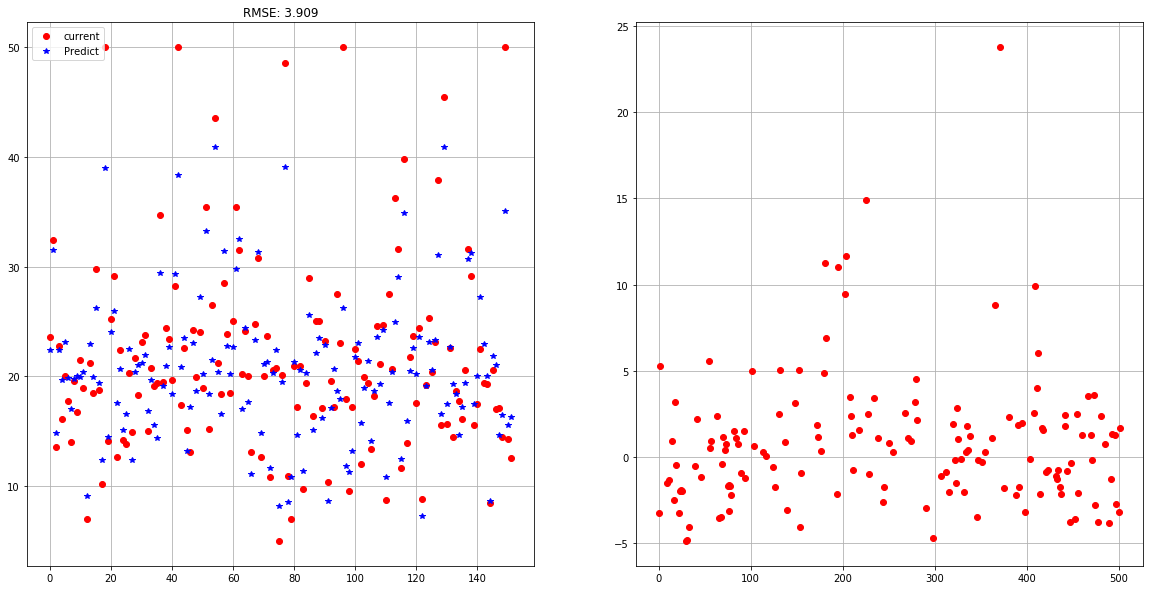

In [67]:
# Modificar la learning rate y la cantidad de estimadores
# le deje learning_rate en 0.15, prueba con 0.1 y cambia bastante el rendimiento
# igual la cantidad de estimadores tambien afecta mucho el ajuste
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3,
                          learning_rate=0.15, max_depth=5, alpha=10,
                          n_estimators=20)

xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
residuales = y_test - preds

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2,figsize=(20,10))
axes = axes.reshape(-1,)
axes[0].plot(np.arange(y_test.shape[0]), y_test, "ro", label="current")
axes[0].plot(np.arange(y_test.shape[0]), preds, "b*", label="Predict")
axes[0].grid()
axes[0].set_title(f"RMSE: {rmse:0.3f}")
axes[0].legend()
axes[1].plot(residuales, "ro")
axes[1].grid()
plt.show()